

# Project 1: Oil Production and Consumption Influences on Income per Person

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Three data sets were chosen for this report: oil production per person, oil consuption per person and income per person from www.gapminder.org .Income per person was preferred to GDP as the focus is to find out wheter there is a connection between oil production, consuption and the wealth of people living in the country. Also, it will be interesting to find out whether the countries that produce oil are higher than the countries which not. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

### General Properties

Reading csv files:

In [2]:
consumption = pd.read_csv('consumption.csv', encoding = "ISO-8859-1")
production = pd.read_csv('production.csv',  encoding = "ISO-8859-1")
income = pd.read_csv('income.csv',  encoding = "ISO-8859-1")

In [3]:
consumption.head()

,Oil Consumption per capita (tonnes per year),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Algeria,0.108110,0.138432,0.125511,0.129930,0.133069,0.147823,0.161515,0.172184,0.181965,...,0.283873,0.309905,0.317546,0.327139,0.335662,0.344978,0.380591,0.407020,0.426321,0.420095
1,Argentina,0.984543,1.002475,1.012162,1.019759,1.044630,0.914884,0.963689,0.934254,0.919388,...,0.512277,0.454281,0.462037,0.479933,0.508694,0.526754,0.589127,0.609841,0.591576,0.635944
2,Australia,1.487883,1.559705,1.665971,1.798001,1.880424,1.920986,1.986703,1.947889,2.093649,...,1.966032,1.936845,1.929172,1.929547,1.952527,1.996413,1.975960,1.973667,1.926738,1.913026
3,Austria,0.761418,0.829781,0.882524,1.016012,1.110532,1.214990,1.350675,1.451278,1.566887,...,1.592590,1.613251,1.737840,1.680400,1.721290,1.715779,1.611835,1.608884,1.553233,1.548791
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.487214,0.442619,0.509984,0.539998,0.622620,0.559487,0.509692,0.373485,0.352944,0.359173


After reading the files, found out that the country names are not used as indexes, thus, will reaload the data indicating the countries as indexes.

In [4]:
consumption = pd.read_csv('consumption.csv', index_col = 0, encoding = "ISO-8859-1")
production = pd.read_csv('production.csv', index_col = 0, encoding = "ISO-8859-1")
income = pd.read_csv('income.csv',index_col = 0,  encoding = "ISO-8859-1")

Let's look at the information:

In [5]:
production.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
"Crude oil production, per capita (toe)",,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,2.221001,2.769616,3.108021,3.314212,3.357394,3.507009,2.618897,3.431215,3.38073,3.050411,...,2.254766,2.475601,2.579049,2.628208,2.58152,2.550594,2.486932,2.227369,2.128699,2.065344


In [6]:
production.shape

(275, 47)

In [7]:
consumption.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Oil Consumption per capita (tonnes per year),,,,,,,,,,,,,,,,,,,,,
Algeria,0.108110,0.138432,0.125511,0.129930,0.133069,0.147823,0.161515,0.172184,0.181965,0.195566,...,0.283873,0.309905,0.317546,0.327139,0.335662,0.344978,0.380591,0.407020,0.426321,0.420095
Argentina,0.984543,1.002475,1.012162,1.019759,1.044630,0.914884,0.963689,0.934254,0.919388,0.901413,...,0.512277,0.454281,0.462037,0.479933,0.508694,0.526754,0.589127,0.609841,0.591576,0.635944
Australia,1.487883,1.559705,1.665971,1.798001,1.880424,1.920986,1.986703,1.947889,2.093649,2.121358,...,1.966032,1.936845,1.929172,1.929547,1.952527,1.996413,1.975960,1.973667,1.926738,1.913026
Austria,0.761418,0.829781,0.882524,1.016012,1.110532,1.214990,1.350675,1.451278,1.566887,1.398060,...,1.592590,1.613251,1.737840,1.680400,1.721290,1.715779,1.611835,1.608884,1.553233,1.548791
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.487214,0.442619,0.509984,0.539998,0.622620,0.559487,0.509692,0.373485,0.352944,0.359173


In [8]:
consumption.shape

(64, 46)

In [9]:
income.head()

,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
"GDP per capita PPP, with projections",,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1154.859365,1214.613653,1261.354184,1349.696941,1351.014534,1374.066507,1417.760346,1461.588637,1500.605759,1527.470197
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6550.896164,6746.445312,6914.267317,6969.306283,7059.456493,7199.943200,7343.225649,7489.359482,7638.401485,7790.409455
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6173.729741,6300.648214,6354.640523,6419.127829,6534.732615,6658.740348,6796.973367,6948.204385,7107.780582,7273.948820


In [10]:
income.shape

(260, 255)

The shape of all the dataframes show that the number of coulmns i.e years are not the same, thus, will need to trim all of them to fit in the same time frame;
Nans will need to be taken care of for each frame separately;
Let's also check if there are any duplicates:

In [11]:
income.duplicated().sum()

29

In [12]:
consumption.duplicated().sum()

0

In [13]:
production.duplicated().sum()

226

### Data Cleaning

A. Sliced all three data frames so that all fit in the same data frame 1965-2010;
The consumption frame seems to be fine, however, production and income need to be sliced:
1. Production just needs to have 2011 column dropped: 

In [14]:
production.drop(columns = "2011", inplace = True)
production.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"Crude oil production, per capita (toe)",,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,2.221001,2.769616,3.108021,3.314212,3.357394,3.507009,2.618897,3.431215,3.38073,3.050411,...,2.122218,2.254766,2.475601,2.579049,2.628208,2.58152,2.550594,2.486932,2.227369,2.128699


2. Income needs to have the indexes for the years 1965 and 2010 found, so will loop through to get endexes: 

In [15]:
for i, v in enumerate(income.columns):
    print (i, v)

0 1764
1 1765
2 1766
3 1767
4 1768
5 1769
6 1770
7 1771
8 1772
9 1773
10 1774
11 1775
12 1776
13 1777
14 1778
15 1779
16 1780
17 1781
18 1782
19 1783
20 1784
21 1785
22 1786
23 1787
24 1788
25 1789
26 1790
27 1791
28 1792
29 1793
30 1794
31 1795
32 1796
33 1797
34 1798
35 1799
36 1800
37 1801
38 1802
39 1803
40 1804
41 1805
42 1806
43 1807
44 1808
45 1809
46 1810
47 1811
48 1812
49 1813
50 1814
51 1815
52 1816
53 1817
54 1818
55 1819
56 1820
57 1821
58 1822
59 1823
60 1824
61 1825
62 1826
63 1827
64 1828
65 1829
66 1830
67 1831
68 1832
69 1833
70 1834
71 1835
72 1836
73 1837
74 1838
75 1839
76 1840
77 1841
78 1842
79 1843
80 1844
81 1845
82 1846
83 1847
84 1848
85 1849
86 1850
87 1851
88 1852
89 1853
90 1854
91 1855
92 1856
93 1857
94 1858
95 1859
96 1860
97 1861
98 1862
99 1863
100 1864
101 1865
102 1866
103 1867
104 1868
105 1869
106 1870
107 1871
108 1872
109 1873
110 1874
111 1875
112 1876
113 1877
114 1878
115 1879
116 1880
117 1881
118 1882
119 1883
120 1884
121 1885
122 1886
123

Slice the needed part of income dataset and check if it worked: 

In [16]:
income = income.iloc[:, 201:247]

In [17]:
income.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"GDP per capita PPP, with projections",,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,845.220662,833.614056,836.197138,845.079979,837.620774,833.315923,773.695138,739.981106,803.486537,825.580031,...,595.038741,726.734055,785.127571,804.717458,874.0,887.914578,983.652314,984.805841,1154.859365,1214.613653
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2563.945574,2660.074837,2760.196931,2859.812013,2956.937360,3066.022933,3188.577281,3313.422188,3478.459169,3491.426597,...,4476.045166,4604.211737,4855.210024,5115.252837,5369.0,5652.049321,5958.021197,6365.530359,6550.896164,6746.445312
Algeria,3327.991220,3070.753392,3246.991771,3519.794116,3747.744528,4003.573590,3559.349909,4182.663766,4194.603349,4320.959308,...,5156.447405,5288.040382,5576.851564,5790.967692,6011.0,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214


B. Dealing with NaNs:

a1.Remove countries that have not been producing any oil and check if it worked:

In [18]:
production.dropna(axis = 0, how = 'all', inplace = True)

a2. Fill NaNs with 0 as for the years some countries were not producing any oil:

In [19]:
production.fillna(0, inplace = True)


In [20]:
production.isnull().sum().sum()

0

b1. Remove countries that do not have any data on the income:
b2. Find out if there are countries that do not have income data for half or more than half of the time frame. Previously income.shape showed we have 47 columns, thus, we will drop any rows that have more than 23 cells filled with Nan.

In [21]:
income.isnull().sum()

1965    86
1966    86
1967    85
1968    85
1969    85
1970    54
1971    53
1972    54
1973    42
1974    50
1975    50
1976    49
1977    50
1978    50
1979    50
1980    50
1981    49
1982    50
1983    50
1984    50
1985    50
1986    49
1987    50
1988    50
1989    50
1990    42
1991    48
1992    48
1993    47
1994    47
1995    47
1996    46
1997    47
1998    47
1999    46
2000    46
2001    39
2002    43
2003    43
2004    43
2005    30
2006    44
2007    47
2008    50
2009    50
2010    50
dtype: int64

In [22]:
income.dropna(axis = 0, how = 'all', thresh = 23, inplace = True)

In [23]:
income.isnull().sum()

1965    36
1966    36
1967    35
1968    35
1969    35
1970     4
1971     4
1972     4
1973     0
1974     0
1975     0
1976     0
1977     0
1978     0
1979     0
1980     0
1981     0
1982     0
1983     0
1984     0
1985     0
1986     0
1987     0
1988     0
1989     0
1990     1
1991     2
1992     1
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     1
2007     1
2008     3
2009     3
2010     3
dtype: int64

b3. To fill in the remaining NaNs I will use interpolate method:

In [24]:
income.interpolate(method = 'linear', limit_direction = 'backward', axis = 0, inplace=True)

b4. Check if all the NaNs were sucessfully filled in:

In [25]:
income.isnull().sum().sum()

0

c1. Remove countries that do not have any data in the consumtpion:
c2. Find out if there are countries that do not have consumption data for half or more than half of the time frame. Previously consumption.shape showed we have 47 columns, thus, we will drop any rows that have more than 23 cells filled with NaNs.

In [26]:
consumption.isnull().sum()

1965    11
1966    11
1967    10
1968     9
1969     9
1970     9
1971     9
1972     8
1973     8
1974     8
1975     8
1976     8
1977     8
1978     8
1979     8
1980     8
1981     8
1982     8
1983     8
1984     8
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     1
2010     1
dtype: int64

In [27]:
consumption.dropna(axis = 0, how = 'all', thresh = 23, inplace = True)

In [28]:
consumption.isnull().sum()

1965    11
1966    11
1967    10
1968     9
1969     9
1970     9
1971     9
1972     8
1973     8
1974     8
1975     8
1976     8
1977     8
1978     8
1979     8
1980     8
1981     8
1982     8
1983     8
1984     8
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     1
2010     1
dtype: int64

c2. Fill in empty cells with intrapolation and check if it worked:

In [29]:
consumption.interpolate(method = 'linear', limit_direction = 'backward', axis = 0, inplace=True)

In [30]:
consumption.isnull().sum().sum()

0

C. I am interested to look at the connection between wealth, production and consumptions, thus, I need to filter the data frames and only keep countries that have values in all three areas:


1.Check if there are any mismatching entries:

In [31]:
consumption.index.equals(income.index)

False

In [32]:
production.shape

(48, 46)

In [33]:
income.shape

(210, 46)

In [34]:
consumption.shape

(64, 46)

2. Let's combine a list (l) of countries that are in all three data frames: 

In [35]:
l = set(production.index).intersection(consumption.index, income.index)

3. Let's slice all three lists and only keep the countries that are in all three frames and check if it worked: 

In [36]:
income = income[income.index.isin(l)]

In [37]:
consumption = consumption[consumption.index.isin(l)]

In [38]:
production = production[production.index.isin(l)]

In [39]:
income.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"GDP per capita PPP, with projections",,,,,,,,,,,,,,,,,,,,,
Algeria,3327.991220,3070.753392,3246.991771,3519.794116,3747.744528,4003.573590,3559.349909,4182.663766,4194.603349,4320.959308,...,5156.447405,5288.040382,5576.851564,5790.967692,6011.0,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214
Argentina,8022.442672,7955.974182,8052.953021,8284.391228,8870.893961,9212.302910,9408.191221,9443.038526,9633.499469,9989.810115,...,9992.710539,8797.640716,9481.372262,10232.096850,11063.0,11865.582300,12748.363620,13457.948750,13420.789250,14486.636600
Australia,13739.926880,13860.958060,14526.124650,15088.558360,15647.109380,16273.142140,16633.125900,16788.629480,17429.718050,17574.581670,...,30043.242770,30687.754730,31634.242430,32098.506150,32798.0,33204.155730,34196.812420,34444.333060,34389.099270,34884.763760
Azerbaijan,3384.266020,3508.468943,3624.784015,3799.295438,3816.384847,4071.803026,4139.168140,4121.383030,4425.476369,4488.361681,...,2775.739802,3059.179927,3387.790782,3760.105577,4648.0,6174.304030,7617.241876,8330.512625,8985.408113,9325.554448
Brazil,3261.050722,3385.404102,3429.864357,3666.978272,3909.480446,4184.068238,4554.847155,4985.711467,5558.500196,5873.833478,...,8022.523305,8131.212843,8110.411789,8461.498669,8596.0,8842.429401,9290.118627,9681.548355,9564.568719,10195.448150


In [40]:
production.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"Crude oil production, per capita (toe)",,,,,,,,,,,,,,,,,,,,,
Algeria,2.221001,2.769616,3.108021,3.314212,3.357394,3.507009,2.618897,3.431215,3.380730,3.050411,...,2.122218,2.254766,2.475601,2.579049,2.628208,2.581520,2.550594,2.486932,2.227369,2.128699
Argentina,0.617347,0.647333,0.695677,0.751406,0.766684,0.833933,0.884918,0.896178,0.856434,0.824224,...,1.113529,1.086150,1.058991,0.985605,0.936949,0.916548,0.887600,0.859233,0.843084,0.805436
Australia,0.030477,0.038315,0.087336,0.158852,0.178659,0.683875,1.174591,1.229896,1.513819,1.473936,...,1.781378,1.750024,1.497353,1.289308,1.253920,1.147272,1.169823,1.132143,1.030714,1.105928
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.828611,1.863349,1.853467,1.844530,2.608274,3.731228,4.850248,5.003410,5.584131,5.533239
Brazil,0.059644,0.070875,0.086888,0.093057,0.098983,0.091592,0.093482,0.089412,0.088624,0.090074,...,0.396364,0.438422,0.447870,0.439330,0.480279,0.501188,0.503165,0.518122,0.548731,0.573012


In [41]:
consumption.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Oil Consumption per capita (tonnes per year),,,,,,,,,,,,,,,,,,,,,
Algeria,0.108110,0.138432,0.125511,0.129930,0.133069,0.147823,0.161515,0.172184,0.181965,0.195566,...,0.283873,0.309905,0.317546,0.327139,0.335662,0.344978,0.380591,0.407020,0.426321,0.420095
Argentina,0.984543,1.002475,1.012162,1.019759,1.044630,0.914884,0.963689,0.934254,0.919388,0.901413,...,0.512277,0.454281,0.462037,0.479933,0.508694,0.526754,0.589127,0.609841,0.591576,0.635944
Australia,1.487883,1.559705,1.665971,1.798001,1.880424,1.920986,1.986703,1.947889,2.093649,2.121358,...,1.966032,1.936845,1.929172,1.929547,1.952527,1.996413,1.975960,1.973667,1.926738,1.913026
Azerbaijan,0.615139,0.669081,0.708933,0.817097,0.891870,0.976773,1.084002,0.731168,0.789798,0.705980,...,0.487214,0.442619,0.509984,0.539998,0.622620,0.559487,0.509692,0.373485,0.352944,0.359173
Brazil,0.176303,0.186983,0.188159,0.220351,0.235885,0.262122,0.283982,0.318836,0.385539,0.406604,...,0.525170,0.511051,0.483375,0.480579,0.484690,0.493851,0.525743,0.549987,0.553697,0.599652


D. Check if there still are any duplicates and drop them: 

In [42]:
income.duplicated().sum()

0

In [43]:
production.duplicated().sum()

0

In [44]:
consumption.duplicated().sum()

0

E. Now that I have three clean dataframes, I would like to merge them, but before doing so I need to pivot the data so it would be more convenient to merge:
1. Since all three frames share only two aspects: year and country name, I will reset indext and use county names as a column to merge the frames on;
2. I will use melt() to turn the frames from wide to long, so that I have years as a column that I can merge frames on;

In [45]:
production.reset_index(inplace = True)
production.rename(columns = {'Crude oil production, per capita (toe)':'countries'}, inplace = True)

In [46]:
production = pd.melt(production, id_vars = ['countries'], var_name = ['year'], value_name = 'production')

In [47]:
production.head()

,countries,year,production
0,Algeria,1965,2.221001
1,Argentina,1965,0.617347
2,Australia,1965,0.030477
3,Azerbaijan,1965,0.000000
4,Brazil,1965,0.059644


In [48]:
consumption.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Oil Consumption per capita (tonnes per year),,,,,,,,,,,,,,,,,,,,,
Algeria,0.108110,0.138432,0.125511,0.129930,0.133069,0.147823,0.161515,0.172184,0.181965,0.195566,...,0.283873,0.309905,0.317546,0.327139,0.335662,0.344978,0.380591,0.407020,0.426321,0.420095
Argentina,0.984543,1.002475,1.012162,1.019759,1.044630,0.914884,0.963689,0.934254,0.919388,0.901413,...,0.512277,0.454281,0.462037,0.479933,0.508694,0.526754,0.589127,0.609841,0.591576,0.635944
Australia,1.487883,1.559705,1.665971,1.798001,1.880424,1.920986,1.986703,1.947889,2.093649,2.121358,...,1.966032,1.936845,1.929172,1.929547,1.952527,1.996413,1.975960,1.973667,1.926738,1.913026
Azerbaijan,0.615139,0.669081,0.708933,0.817097,0.891870,0.976773,1.084002,0.731168,0.789798,0.705980,...,0.487214,0.442619,0.509984,0.539998,0.622620,0.559487,0.509692,0.373485,0.352944,0.359173
Brazil,0.176303,0.186983,0.188159,0.220351,0.235885,0.262122,0.283982,0.318836,0.385539,0.406604,...,0.525170,0.511051,0.483375,0.480579,0.484690,0.493851,0.525743,0.549987,0.553697,0.599652


In [49]:
consumption.reset_index(inplace = True)
consumption.rename(columns = {'Oil Consumption per capita (tonnes per year)':'countries'}, inplace = True)
consumption = pd.melt(consumption, id_vars = ['countries'], var_name = ['year'], value_name = 'consumption')

In [50]:
consumption.head()

,countries,year,consumption
0,Algeria,1965,0.108110
1,Argentina,1965,0.984543
2,Australia,1965,1.487883
3,Azerbaijan,1965,0.615139
4,Brazil,1965,0.176303


In [51]:
income.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"GDP per capita PPP, with projections",,,,,,,,,,,,,,,,,,,,,
Algeria,3327.991220,3070.753392,3246.991771,3519.794116,3747.744528,4003.573590,3559.349909,4182.663766,4194.603349,4320.959308,...,5156.447405,5288.040382,5576.851564,5790.967692,6011.0,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214
Argentina,8022.442672,7955.974182,8052.953021,8284.391228,8870.893961,9212.302910,9408.191221,9443.038526,9633.499469,9989.810115,...,9992.710539,8797.640716,9481.372262,10232.096850,11063.0,11865.582300,12748.363620,13457.948750,13420.789250,14486.636600
Australia,13739.926880,13860.958060,14526.124650,15088.558360,15647.109380,16273.142140,16633.125900,16788.629480,17429.718050,17574.581670,...,30043.242770,30687.754730,31634.242430,32098.506150,32798.0,33204.155730,34196.812420,34444.333060,34389.099270,34884.763760
Azerbaijan,3384.266020,3508.468943,3624.784015,3799.295438,3816.384847,4071.803026,4139.168140,4121.383030,4425.476369,4488.361681,...,2775.739802,3059.179927,3387.790782,3760.105577,4648.0,6174.304030,7617.241876,8330.512625,8985.408113,9325.554448
Brazil,3261.050722,3385.404102,3429.864357,3666.978272,3909.480446,4184.068238,4554.847155,4985.711467,5558.500196,5873.833478,...,8022.523305,8131.212843,8110.411789,8461.498669,8596.0,8842.429401,9290.118627,9681.548355,9564.568719,10195.448150


In [52]:
income.reset_index(inplace = True)
income.rename(columns = {'GDP per capita PPP, with projections':'countries'}, inplace = True)
income = pd.melt(income, id_vars = ['countries'], var_name = ['year'], value_name = 'income')

In [53]:
income.head()

,countries,year,income
0,Algeria,1965,3327.991220
1,Argentina,1965,8022.442672
2,Australia,1965,13739.926880
3,Azerbaijan,1965,3384.266020
4,Brazil,1965,3261.050722


3. I will loop through all three data frames and will join them on the columns 'countries' and 'years':

In [54]:
dfs = [consumption, production, income]
dfs = [df.set_index(['countries', 'year']) for df in dfs]
a = dfs[0].join(dfs[1:])


In [55]:
a.head()

,,consumption,production,income
countries,year,,,
Algeria,1965,0.108110,2.221001,3327.991220
Argentina,1965,0.984543,0.617347,8022.442672
Australia,1965,1.487883,0.030477,13739.926880
Azerbaijan,1965,0.615139,0.000000,3384.266020
Brazil,1965,0.176303,0.059644,3261.050722


F. Countries that never produced any oil now have NaNs in the production section, I will fill them on with 0 values. 

In [56]:
a.fillna(0).head()

,,consumption,production,income
countries,year,,,
Algeria,1965,0.108110,2.221001,3327.991220
Argentina,1965,0.984543,0.617347,8022.442672
Australia,1965,1.487883,0.030477,13739.926880
Azerbaijan,1965,0.615139,0.000000,3384.266020
Brazil,1965,0.176303,0.059644,3261.050722


In [57]:
a = a.reset_index()

In [58]:
a.head()

,countries,year,consumption,production,income
0,Algeria,1965,0.108110,2.221001,3327.991220
1,Argentina,1965,0.984543,0.617347,8022.442672
2,Australia,1965,1.487883,0.030477,13739.926880
3,Azerbaijan,1965,0.615139,0.000000,3384.266020
4,Brazil,1965,0.176303,0.059644,3261.050722


That looks great. Let's save the cleaned data frame.

In [59]:
a.to_csv('clean_set.csv')

<a id='eda'></a>
# Exploratory Data Analysis

## Is there a connection between oil production, consumption and income?

Let's start by looking at correlation between consumption and income: 

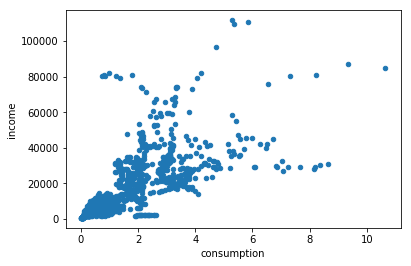

In [60]:
a.plot(x = 'consumption', y = 'income', kind = 'scatter');

### Let's see which countries consume more, the ones with higher than average income or the one with lower?

Let's divide income into two groups: below average as income_low and above average as income_high:

In [61]:
a.income.mean()

14548.03019974428

In [62]:
income_high = a[a['income'] > a.income.mean()]
income_low = a[a['income'] < a.income.mean()]

Now let's see how consumption distributes in these two frames: 

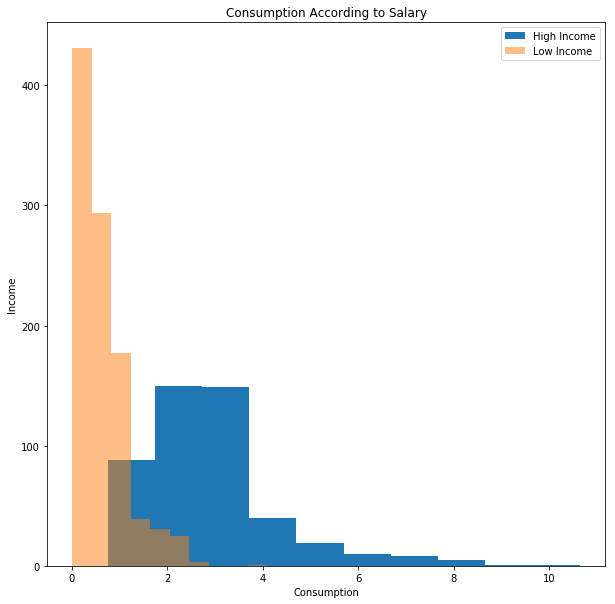

In [63]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(income_high['consumption'], alpha = 1, label = 'High Income')
ax.hist(income_low['consumption'], alpha = 0.5, label = 'Low Income')
ax.set_title('Consumption According to Salary')
ax.set_xlabel('Consumption')
ax.set_ylabel('Income')
ax.legend(loc = 'upper right')
plt.show()

It can be noted that countries with lower than average salary consume way less than the countries with higher than the average salary. 
It is interesting that in lower than average income group, the higher the salary the less oil is consumed.

### Let's look at this group and find out if these countries also procude oil?

On the other hand the countries with the wealthiest income are not the countries that consume the most.
### Let's look if the countries with higher income produce oil? 


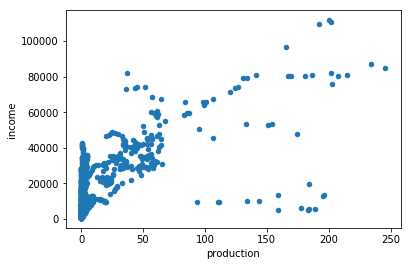

In [64]:
a.plot(x = 'production', y = 'income', kind = 'scatter');

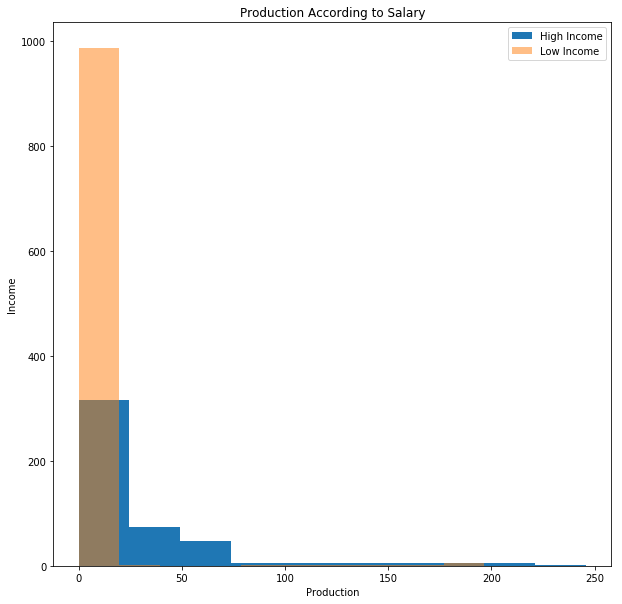

In [65]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(income_high['production'], alpha = 1, label = 'High Income')
ax.hist(income_low['production'], alpha = 0.5, label = 'Low Income')
ax.set_title('Production According to Salary')
ax.set_xlabel('Production')
ax.set_ylabel('Income')
ax.legend(loc = 'upper right')
plt.show()

It looks like the richest countries are not the countries that produce the most oil, however, the more countries produce they seem to belong to the group of countries that have above the average salary. 

### Let's look at top 5 richest countries and their consumption and production of oil

In [66]:
top_income = a.groupby(['countries']).mean().sort_values(by = 'income', ascending = False).head()

In [67]:
top_income

,consumption,production,income
countries,,,
Qatar,2.375065,88.680477,54751.525740
Kuwait,4.907703,84.434245,51871.413450
United States,3.197087,1.764904,32061.100062
United Arab Emirates,4.377900,77.077896,31700.375115
Norway,2.102975,15.887931,31053.282514


### I wonder if the top richest countries are also on top of the production list?

In [68]:
top_produce = a.groupby(['countries']).mean().sort_values(by = 'production', ascending = False).head()

In [69]:
top_produce

,consumption,production,income
countries,,,
Qatar,2.375065,88.680477,54751.525740
Kuwait,4.907703,84.434245,51871.413450
United Arab Emirates,4.377900,77.077896,31700.375115
Saudi Arabia,3.395642,29.396853,23865.186357
Norway,2.102975,15.887931,31053.282514


It looks like countries that produce more oil, have higher than the average income, but it does not seem that all the countries producing the most oil have the highest income, thus, the income may be influenced by other means and not  the oil production alone. 

### Is income per person of countries that produce oil higher than the income per person of countries that do not?

Let's create a mask to filter countries that produce oil and the ones that do not, find the mean to each group to use as reference: 

In [70]:
produce = a.production > 0
donot = a.production == 0

In [71]:
p_mean = a.income[produce].mean()

In [72]:
d_mean = a.income[donot].mean()

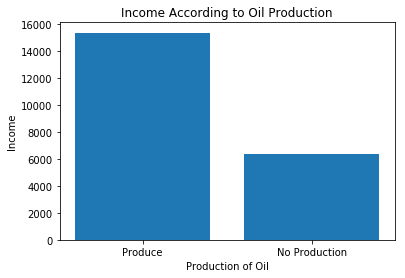

In [73]:
locations = [1, 2]
heights = [p_mean, d_mean]
labels = ['Produce', 'No Production']
plt.bar(locations, heights, tick_label = labels)
plt.title('Income According to Oil Production')
plt.xlabel('Production of Oil')
plt.ylabel('Income');

The average income of countries that produce oil seems to be much higher than of countries without any oil production.

### Has income, production and consumption been fluctuating thoughout the years? Is there a relation?

Create a mask that counts overall consumption, production and income throught the year: 

In [74]:
b = a.groupby('year').sum()

In [75]:
b.head()

,consumption,production,income
year,,,
1965,39.316445,555.046795,298830.688698
1966,39.206931,588.762628,308187.149851
1967,39.463646,577.305751,309089.273057
1968,38.937810,590.533632,317689.956407
1969,39.871088,590.362070,320865.441188


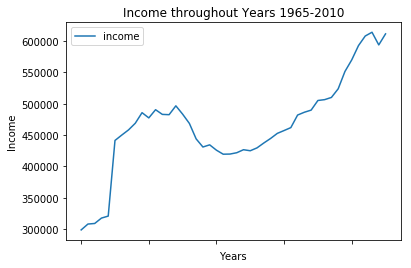

In [76]:
b.plot.line(y = ['income'])
plt.title('Income throughout Years 1965-2010')
plt.xlabel('Years')
plt.ylabel('Income');

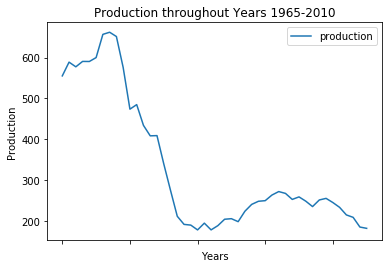

In [77]:
b.plot.line(y = ['production'])
plt.title('Production throughout Years 1965-2010')
plt.xlabel('Years')
plt.ylabel('Production');

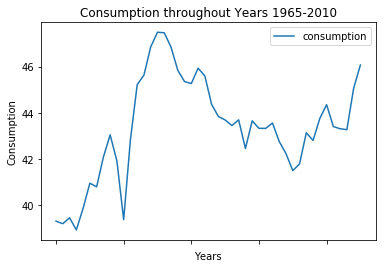

In [78]:
b.plot.line(y = ['consumption'])
plt.title('Consumption throughout Years 1965-2010')
plt.xlabel('Years')
plt.ylabel('Consumption');

Since 1965,although, on different patterns, both the consumption and income have been increasing, while production dropped. 

<a id='conclusions'></a>
# Conclusions

Although there may be a connection between production of oil and higher income, as the countries that produce oil tend to fall into the group of countries that have a higher income, there as well may be other strong influences on the matter as through out the years the overall production has been dropping while the overall income has been going up. On the other hand, the higher the income the more oil is tend to be consumed, however, the countries with highest income are not necessarily the biggest consumers.
